<a href="https://colab.research.google.com/github/mehadisaki/TSF_GRIP_intern_task_Mehadi/blob/main/Task2_Prediction_unSupervise_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The Sparks Foundation GRIP-Data Science and Business Analytics Intern

> **Mehadi Hassan Saki**

> **October 2022**

---
**Task 2 :** Prediction using Unsuppervise ML


In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets


In [64]:
#from google.colab import drive
#drive.mount('/content/gdrive')


Load Dataset

In [65]:
#Iris dataset
url = 'https://raw.githubusercontent.com/mehadisaki/TSF_GRIP_intern_task_Mehadi/main/iris.csv'
data = pd.read_csv(url)
#data = pd.DataFrame(data)


In [66]:
data.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [67]:
 data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [68]:
data["variety"].groupby(data["variety"]).count()

variety
Setosa        50
Versicolor    50
Virginica     50
Name: variety, dtype: int64

In [69]:
data.groupby(data["variety"]).count()

,sepal.length,sepal.width,petal.length,petal.width
variety,,,,
Setosa,50,50,50,50
Versicolor,50,50,50,50
Virginica,50,50,50,50


## Data preparetion for unsuppervise algorithom

For unsuppervise algorithom we need only feature value


In [70]:
# feature
X = data.drop('variety', axis=1)
X.head()

,sepal.length,sepal.width,petal.length,petal.width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [71]:
import seaborn as sns
sns.set_theme(style='darkgrid')

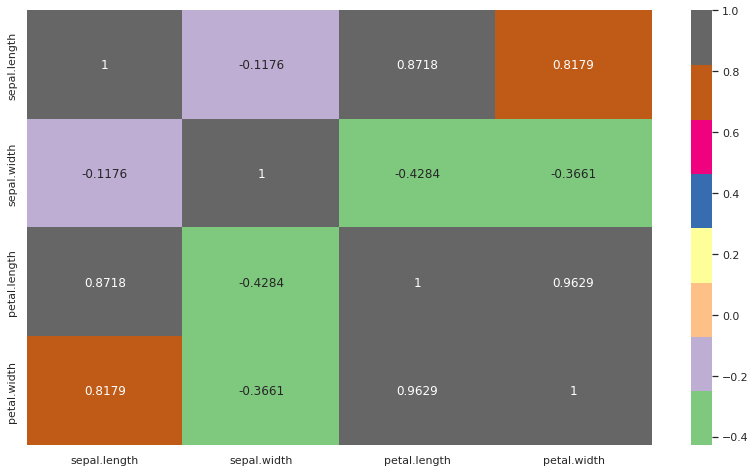

In [72]:
plt.figure(figsize=(14,8))
sns.heatmap(X.corr(), annot = True, cmap="Accent", fmt='.4g')

By this correlation data petal.width with petal.length have storng correlation. sepal.length with petal.length and sepal.length with petal.width have also moderate correlation

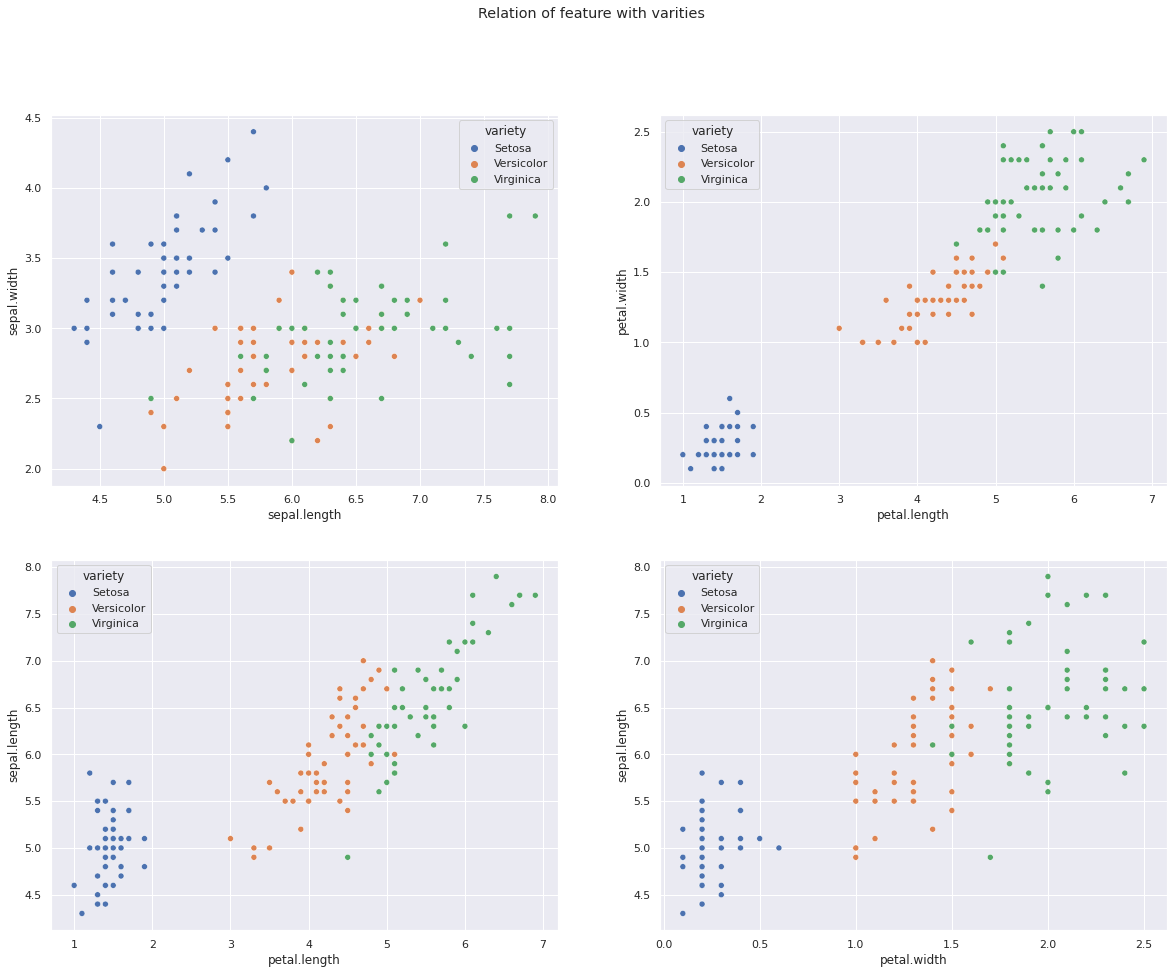

In [73]:
fig, axis = plt.subplots(2,2, figsize=(20,15))
fig.suptitle("Relation of feature with varities")
sns.scatterplot(data=data, x= data['sepal.length'], y=data['sepal.width'], hue=data['variety'], ax= axis[0,0] )
sns.scatterplot(data= data, x= data['petal.length'], y=data['petal.width'],hue=data['variety'],ax= axis[0,1])
sns.scatterplot(data=data, x= data['petal.length'], y= data['sepal.length'], hue= data['variety'],ax=axis[1,0])
sns.scatterplot(data=data, x= data['petal.width'], y= data['sepal.length'], hue= data['variety'], ax = axis[1,1])


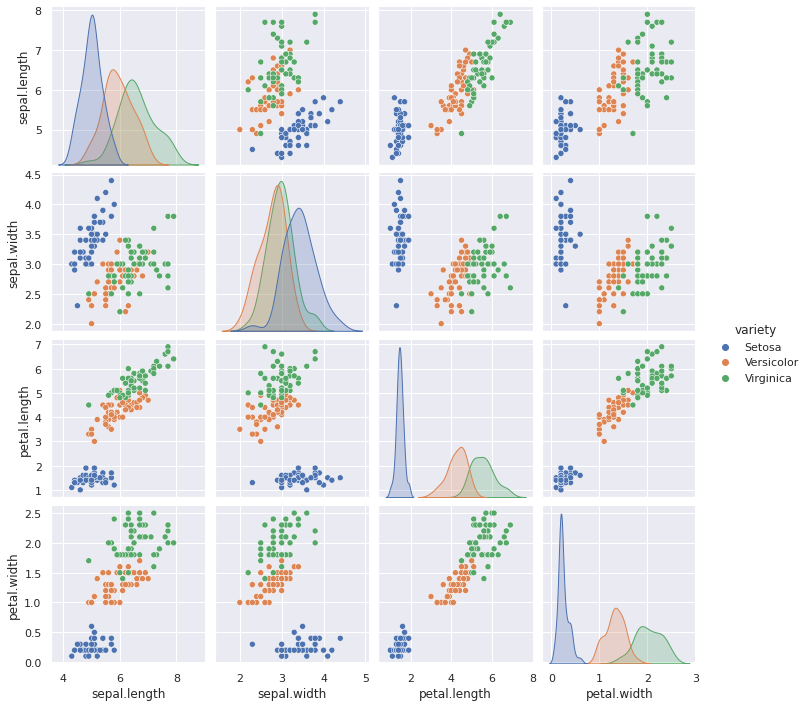

In [74]:
sns.pairplot(data= data, hue= 'variety')

Feature with greater correlation clearly classify the variety of Iris flower.

# Cluster Model building

---

K-mean Clustering

In [75]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder

**Scale the data**

In [76]:
sc = StandardScaler()
X = sc.fit_transform(X)

## Computing cluster number

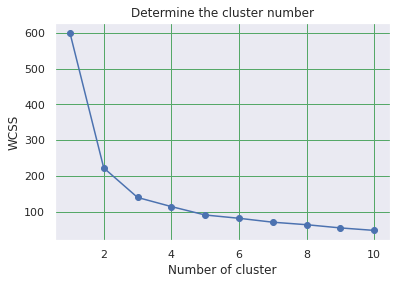

In [77]:
# computing cluster number
# computing wcss ( within cluster squer sum of center distenc)
# increasing cluster number wcss will be decreasing
# clustering 1 to 10 and check the wcss change
wcss =[]
for i in range(1,11):
  kmeans = KMeans(n_clusters= i, init= "k-means++", random_state= 28)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

# ploting the wcss value
plt.plot(range(1,11), wcss, marker ='o')
plt.title( "Determine the cluster number")
plt.ylabel("WCSS")
plt.xlabel("Number of cluster")
plt.grid(b= True,color='g', )
plt.show()


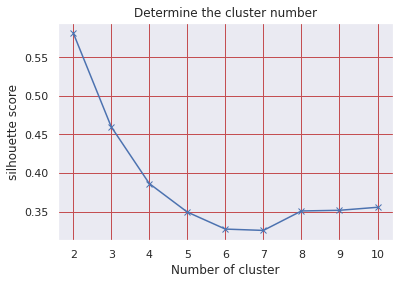

In [78]:
# computing cluster number by Silhouette Score
from sklearn.metrics import silhouette_score
silh =[]
for i in range(2,11):
  kmeans = KMeans(n_clusters= i, init= "k-means++", random_state= 28)
  kmeans.fit(X)
  silh.append(silhouette_score(X, kmeans.labels_))

# ploting the wcss value
plt.plot(range(2,11), silh, marker ='x')
plt.title( "Determine the cluster number")
plt.ylabel("silhouette score")
plt.xlabel("Number of cluster")
plt.grid(b= True,color='r', )
plt.show()

## K-means model

In [79]:
# Now use clusters 3
kmeans_m1 = KMeans(n_clusters= 3, init= "k-means++", random_state= 28)
kmeans_m1.fit(X)

KMeans(n_clusters=3, random_state=28)

In [80]:
# adding labels
Kmeans_label = pd.DataFrame(kmeans_m1.labels_, columns= ["K_labels"])

In [81]:
# combine kmeans label with main data
from pandas.core.internals import concat
cluster_data = pd.concat([data,Kmeans_label], axis= 1)

In [82]:
cluster_data.head()

,sepal.length,sepal.width,petal.length,petal.width,variety,K_labels
0,5.1,3.5,1.4,0.2,Setosa,0
1,4.9,3.0,1.4,0.2,Setosa,0
2,4.7,3.2,1.3,0.2,Setosa,0
3,4.6,3.1,1.5,0.2,Setosa,0
4,5.0,3.6,1.4,0.2,Setosa,0


In [83]:
cluster_data[['variety']].groupby(cluster_data['K_labels']).count()

,variety
K_labels,
0,50
1,47
2,53


# Model evalution

In [84]:
# Feature encoding
#cluster_data = ['Sector']
# Use LabelEncoder function from sklearn
le = LabelEncoder()
cluster_data['var_label'] = cluster_data[['variety']].apply(lambda col: le.fit_transform(col))

In [85]:
cluster_data.head()

,sepal.length,sepal.width,petal.length,petal.width,variety,K_labels,var_label
0,5.1,3.5,1.4,0.2,Setosa,0,0
1,4.9,3.0,1.4,0.2,Setosa,0,0
2,4.7,3.2,1.3,0.2,Setosa,0,0
3,4.6,3.1,1.5,0.2,Setosa,0,0
4,5.0,3.6,1.4,0.2,Setosa,0,0


## Silhouette Score

The value of the silhouette coefﬁcient is between [-1, 1]. A score of 1 denotes the best meaning that the data point i is very compact within the cluster to which it belongs and far away from the other clusters. The worst value is -1. Values near 0 denote overlapping clusters.

In [86]:
## Silhouette Score of Cluster number = 3
from sklearn.metrics import silhouette_score
print("Silhouette score of 3 Clusters =",silhouette_score(X, kmeans_m1.labels_))

Silhouette score of 3 Clusters = 0.45994823920518646



""" 
The Rand Index computes a similarity measure between two clusterings by 
considering all pairs of samples and counting pairs that are assigned in the 
same or different clusters in the predicted and true clusterings. 
"""

In [87]:
from sklearn.metrics import adjusted_rand_score

print("adjusted rand score of 3 Clusters  =",adjusted_rand_score(cluster_data['var_label'], cluster_data['K_labels']))

adjusted rand score of 3 Clusters  = 0.6201351808870379


# Model optimization

---

Using PCA before claustering to improve the Clustering model


In [88]:
from sklearn.decomposition import PCA

In [89]:
#fit with PCA to find PCA component number
pca = PCA()
pca.fit(X)

PCA()

In [90]:
pca.explained_variance_ratio_

array([0.72962445, 0.22850762, 0.03668922, 0.00517871])

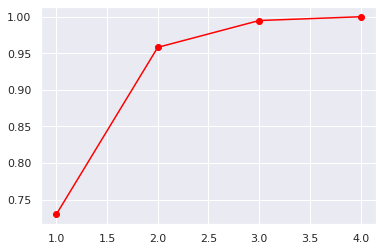

In [91]:
from matplotlib import markers
plt.plot(range(1,5,1),pca.explained_variance_ratio_.cumsum(), marker='o', color='red')

From Cumilitive varience plot it is show that, component 2 explain more then 95% varience. So we keep 2 Principal component.


In [92]:
pca = PCA(n_components=2)

In [93]:
#Fit and transform the data
x_pca = pca.fit_transform(X)

## Build K-menas model over PCA data

**Computing cluster number**

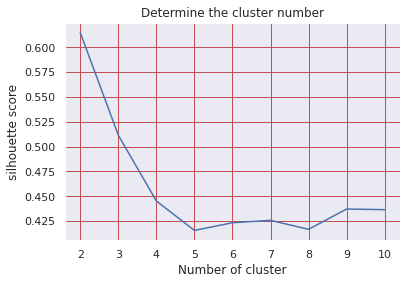

In [94]:
# computing cluster number by Silhouette Score
from sklearn.metrics import silhouette_score
silh =[]
for i in range(2,11):
  kmeans = KMeans(n_clusters= i, init= "k-means++", random_state= 28)
  kmeans.fit(x_pca)
  silh.append(silhouette_score(x_pca, kmeans.labels_))

# ploting the wcss value
plt.plot(range(2,11), silh)
plt.title( "Determine the cluster number")
plt.ylabel("silhouette score")
plt.xlabel("Number of cluster")
plt.grid(b= True,color='r', )
plt.show()


From Silhouette Score we can sellect 2 cluster number

In [95]:
# Now use clusters 2 with pca data
kmeans_pca = KMeans(n_clusters= 2, init= "k-means++", random_state= 28)
kmeans_pca.fit(x_pca)

KMeans(n_clusters=2, random_state=28)

In [96]:
x_pca = pd.DataFrame(x_pca, columns= ['component-1', 'component-2'])
x_pca_labels= pd.DataFrame(kmeans_pca.labels_ , columns=['labels'])

In [97]:
x_pca_cluster = pd.concat([x_pca,x_pca_labels], axis=1)
x_pca_cluster.head()

,component-1,component-2,labels
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0
3,-2.299384,-0.597395,0
4,-2.389842,0.646835,0


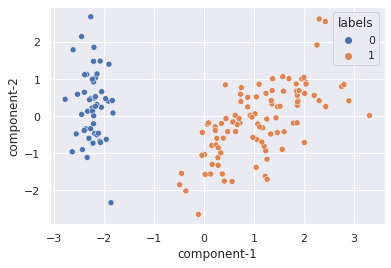

In [98]:
sns.scatterplot(data=x_pca_cluster,x= x_pca_cluster['component-1'],y= x_pca_cluster['component-2'], hue='labels')

In [99]:
x_pca_cluster.groupby(x_pca_cluster['labels']).count()

,component-1,component-2
labels,,
0,50,50
1,100,100


 ## Silhouette Score of Kmeans with PCA data




In [100]:
## Silhouette Score of Cluster number = 3
from sklearn.metrics import silhouette_score
print("Silhouette score of 2 Clusters with PCA data =",silhouette_score(x_pca, kmeans_pca.labels_))

Silhouette score of 2 Clusters with PCA data = 0.6145202036230452


# Conclusion

By original data Silhouette score 0.4599 and 
After PCA Silhouette score is 0.614 

 **So it is clearly shown that, PCA improve the clustering model.**
 **By visualization it is shown that data claustering after PCA is clearly separate**  



